### Name:-Prachi Balaji Upare
### Roll no.:-2447053
### Batch:-C
### Practical No.5:- Implement Random Forest Classifier model to predict the safety of the car. Dataset link: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve,f1_score,precision_score,recall_score,accuracy_score
from sklearn import metrics

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv('car_evaluation.csv')
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [3]:
data = data.apply(LabelEncoder().fit_transform)

In [4]:
X = data.iloc[:, :-1] 
y = data.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [7]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = rf_classifier.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [10]:
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9624277456647399

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.91      0.67      0.77        15
           2       0.99      1.00      0.99       237
           3       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



In [11]:
cm1=confusion_matrix(y_test,y_pred)
cm1

array([[ 72,   1,   3,   1],
       [  2,  10,   0,   3],
       [  1,   0, 236,   0],
       [  2,   0,   0,  15]], dtype=int64)

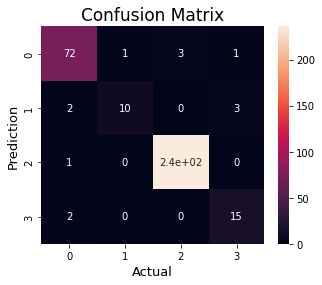

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm1, 
            annot=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()